# Iris Flower Classificaton
###  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To Suppress warnings
from warnings import filterwarnings
filterwarnings(action='ignore')

### Importing Iris Dataset

In [2]:
iris_df = pd.read_csv("IRIS.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Understanding Dataset

In [3]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Data Visualization

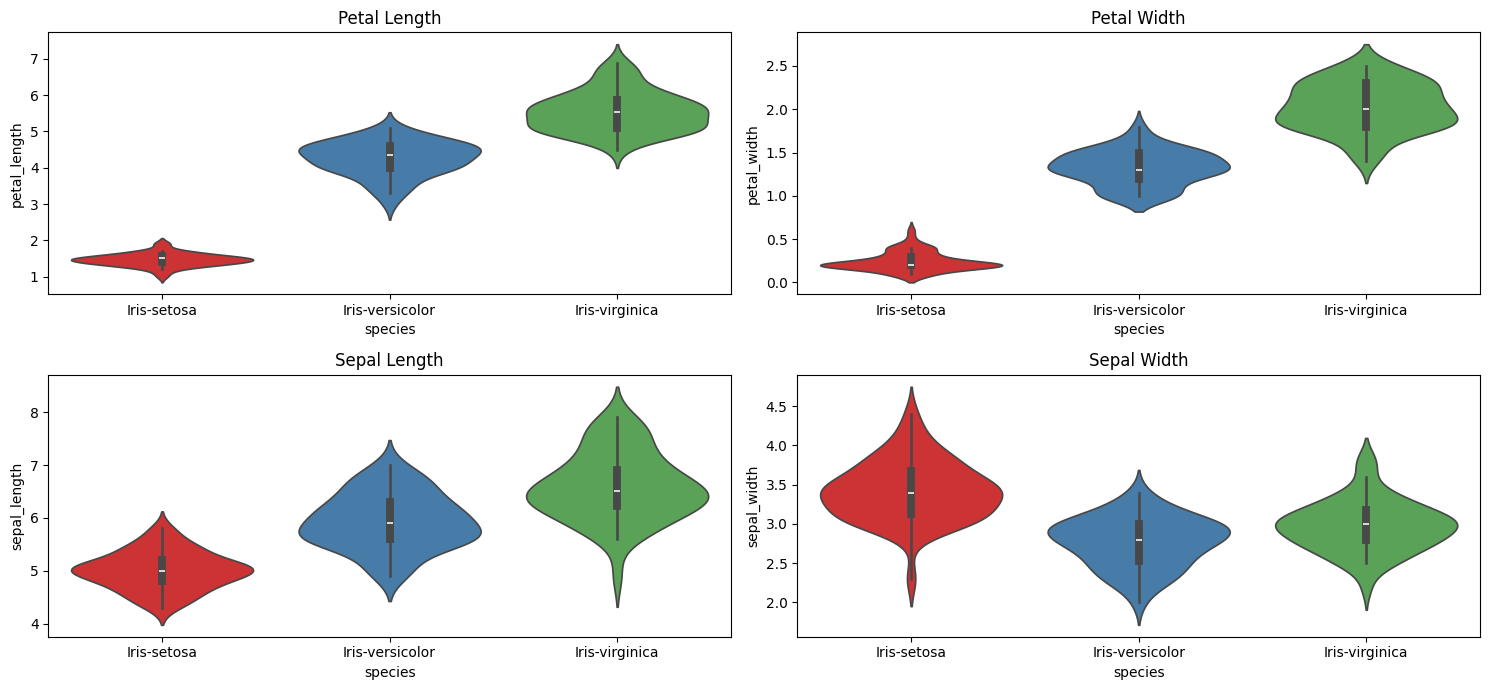

In [6]:
plt.figure(figsize=(15,7))

colors = sns.color_palette("Set1")

plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length', palette=colors, data=iris_df)
plt.title('Petal Length')

plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width', palette=colors,data=iris_df)
plt.title('Petal Width')

plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length', palette=colors,data=iris_df)
plt.title('Sepal Length')

plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width', palette=colors,data=iris_df)
plt.title('Sepal Width')

plt.tight_layout()

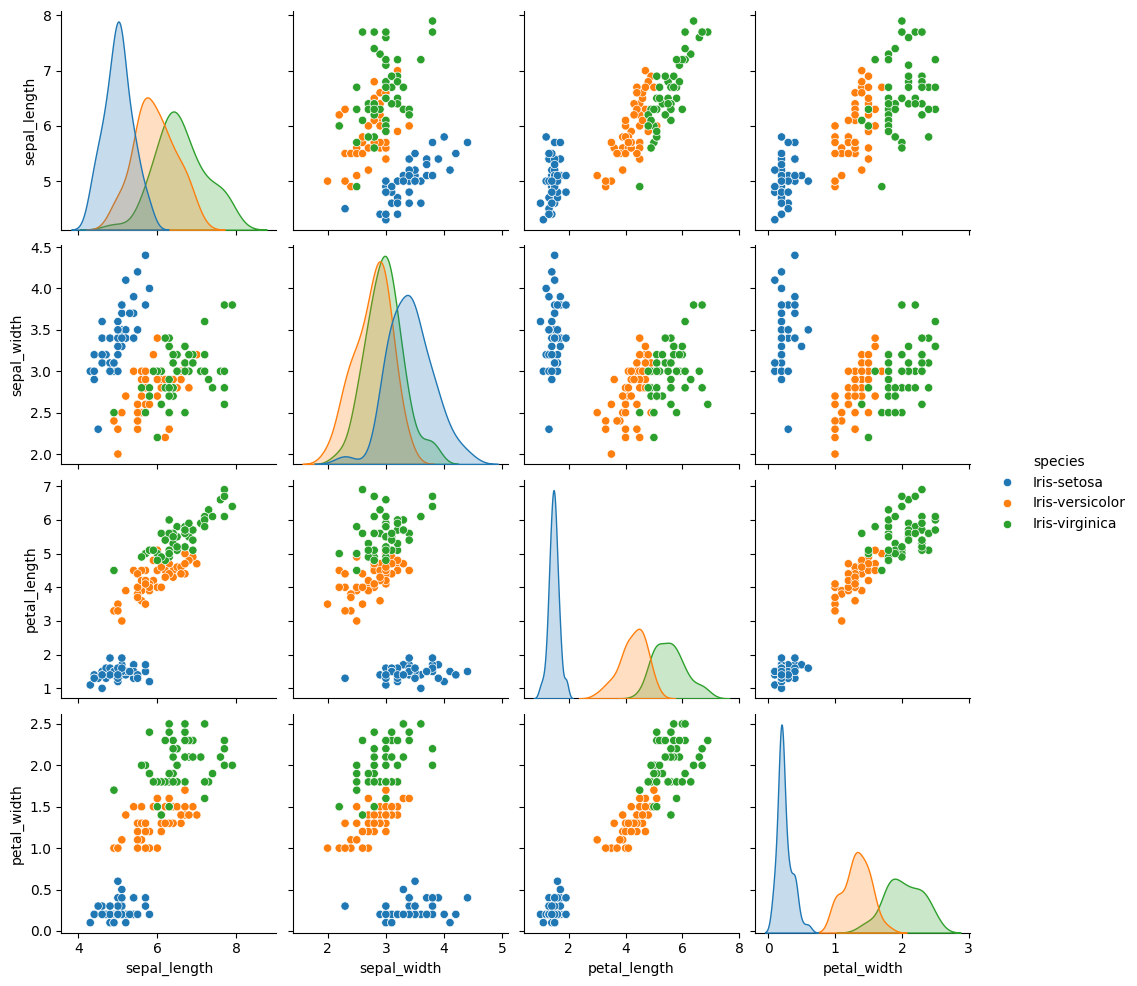

In [7]:
sns.pairplot(iris_df,hue='species');

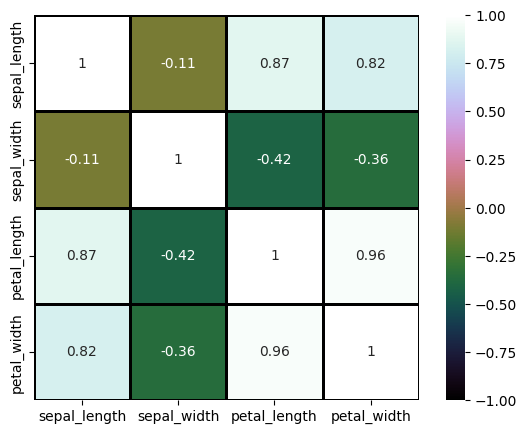

In [8]:
# to draw heat map

numeric_columns = iris_df.select_dtypes(include=[np.number]).columns
fig = plt.gcf()
fig.set_size_inches(7, 5)

heatmap = sns.heatmap(iris_df[numeric_columns].corr(),
                      annot=True,
                      cmap='cubehelix',
                      linewidths=1,
                      linecolor='k',
                      square=True,
                      mask=False,
                      vmin=-1,
                      vmax=1,
                      cbar_kws={"orientation": "vertical"},
                      cbar=True)


## Model Training

In [9]:
# Importing necessary libraries for model training

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
X = iris_df.drop(columns=['species'])
Y = iris_df['species']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [12]:
# Function to evaluate and visualize the models

def evaluate_models(models, x_train, x_test, y_train, y_test):
    results = []

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        accuracy = model.score(x_test, y_test)
        classification_rep = classification_report(y_test, y_pred)
        confusion_mat = confusion_matrix(y_test, y_pred)

        # to plot and save the confusion matrix 
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(f'{name}_confusion_matrix.png')
        plt.close()

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Classification Report': classification_rep,
            'Confusion Matrix': confusion_mat,
            'Model Instance': model,
            'Confusion Matrix Plot': f'{name}_confusion_matrix.png'
        })

    return pd.DataFrame(results)

In [13]:
# Defining models

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': SVC(),
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [14]:
evaluation_results = evaluate_models(models, x_train, x_test, y_train, y_test)

Model: Logistic Regression
Accuracy: 0.9333
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]



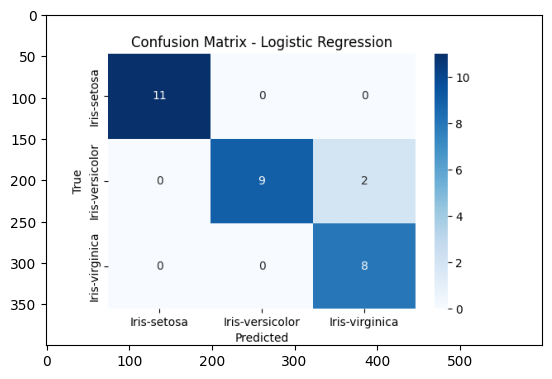

Model: Support Vector Machines
Accuracy: 0.9333
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]



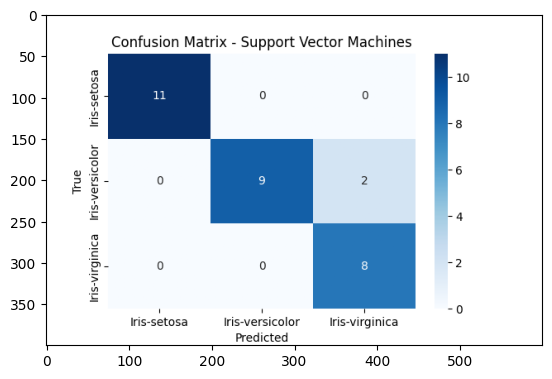

Model: KNN
Accuracy: 0.9000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.73      0.84        11
 Iris-virginica       0.73      1.00      0.84         8

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.89        30
   weighted avg       0.93      0.90      0.90        30

Confusion Matrix:
[[11  0  0]
 [ 0  8  3]
 [ 0  0  8]]



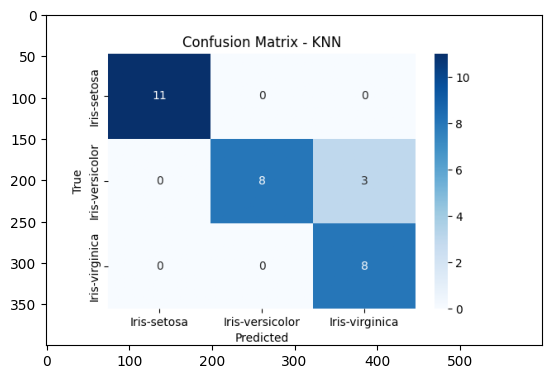

Model: GaussianNB
Accuracy: 0.8667
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      0.73      0.80        11
 Iris-virginica       0.70      0.88      0.78         8

       accuracy                           0.87        30
      macro avg       0.86      0.87      0.86        30
   weighted avg       0.88      0.87      0.87        30

Confusion Matrix:
[[11  0  0]
 [ 0  8  3]
 [ 0  1  7]]



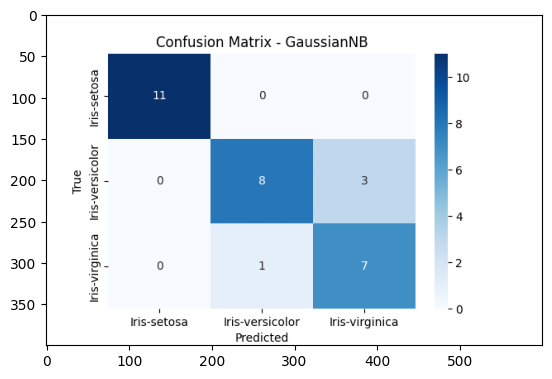

Model: Decision Tree
Accuracy: 0.8000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.78      0.64      0.70        11
 Iris-virginica       0.60      0.75      0.67         8

       accuracy                           0.80        30
      macro avg       0.79      0.80      0.79        30
   weighted avg       0.81      0.80      0.80        30

Confusion Matrix:
[[11  0  0]
 [ 0  7  4]
 [ 0  2  6]]



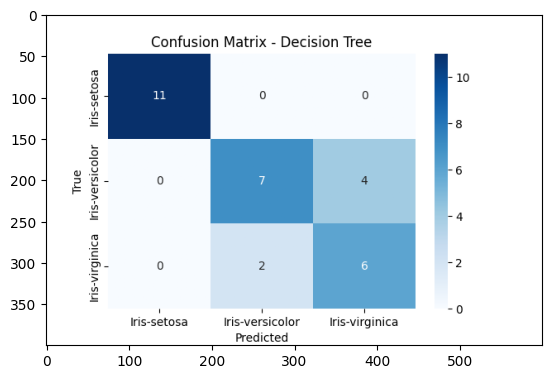

In [17]:
# Displaying the results of model evaluation

for _, row in evaluation_results.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Accuracy: {row['Accuracy']:.4f}")
    print(f"Classification Report:\n{row['Classification Report']}")
    print(f"Confusion Matrix:\n{row['Confusion Matrix']}\n")
    img = plt.imread(row['Confusion Matrix Plot'])
    plt.imshow(img)
    plt.show()

### Prediction on new data

In [16]:
# Using a new set of data for prediction

new_data = pd.DataFrame({
    "sepal_length": [6.7],
    "sepal_width": [2.5],
    "petal_length": [5.8],
    "petal_width": [1.8]
})

best_model_row = evaluation_results.loc[evaluation_results['Accuracy'].idxmax()]

best_model_instance = best_model_row['Model Instance']

# Making prediction using best model
prediction = best_model_instance.predict(new_data)
print(f"Best Model: {best_model_row['Model']}")
print(f"Prediction: {prediction}")


Best Model: Logistic Regression
Prediction: ['Iris-virginica']
